# Linear classification

## Import libs and data

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
data=pd.read_csv("data/NVIE_PS_feature.csv",sep=',')
data=data[0:514]
data

,P\S,subject,gender,expression,point.x,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,1,7,1,1,1.4127,4.6432,1.3710,5.3590,14.2933,-1.4127,...,0.4073,-0.2506,-4.2517,-0.4163,0.2640,0.8772,-2.9359,-0.5370,-0.5147,-0.4923
1,1,7,1,2,0.6363,3.1680,0.5170,3.8839,9.0138,-1.7233,...,0.3792,-0.2787,0.2941,-1.2926,-0.7044,-1.0836,-0.7430,-0.6811,-0.1625,-0.2322
2,1,7,1,4,-1.9095,9.1463,-0.1123,4.9422,16.4794,-0.7221,...,-0.2496,0.4718,5.0000,1.2023,1.2023,2.4864,7.0055,10.9619,10.3040,8.9565
3,1,7,1,6,-1.5991,2.3853,-1.2502,6.7380,9.6564,-2.1745,...,-0.2254,-0.1840,-0.1748,-0.6303,0.0690,0.6441,-0.2576,2.5028,3.2435,1.8863
4,1,8,1,1,-2.5935,-4.4076,-2.0266,-2.8345,-3.8832,-2.1684,...,1.1778,-1.0120,-1.7529,-0.5143,-0.4590,-0.4866,-4.7280,2.3114,1.5815,2.2838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,1,210,1,5,1.6129,2.1505,0.0000,-0.5376,-0.5377,-0.5376,...,-0.3589,0.0361,-0.4983,1.4704,1.4834,1.0622,0.2918,-2.0129,-1.5982,-3.2243
510,1,210,1,2,3.8070,4.9288,5.0712,-4.5278,-6.5388,-2.7259,...,-0.5530,-0.1596,-2.2648,0.9234,1.3496,0.9234,-0.2485,-2.9363,-3.3379,-4.5592
511,1,210,1,4,1.6772,3.3894,0.4150,-0.9526,-4.4530,-0.5902,...,-0.9112,0.3122,0.6902,0.4860,0.9432,0.4860,1.8764,1.4445,3.5639,2.3219
512,1,210,1,3,-0.4122,1.5053,1.2724,-0.1434,-2.5448,-3.4767,...,0.0853,-0.4389,1.7610,1.3115,1.8356,1.3115,2.9250,2.9392,3.8651,3.0210


In [4]:
data.shape

(514, 58)

In [5]:
dic={}
for i in range(5,31):
    dic['Unnamed: {0}'.format(i)]='ptx{0}'.format(i-4)
for i in range(32,58):
    dic['Unnamed: {0}'.format(i)]='pty{0}'.format(i-31)
dic['point.x']='ptx0'
dic['point.y']='pty0'
data.rename(columns=dic,inplace=True)

In [6]:
data
del data['subject']
del data['P\\S']
col=list(data.columns)
col.remove('expression')
x=data[col]

## SVM Model

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
import matplotlib.pyplot as plt
def test_model(clf):
    scores=cross_val_score(clf,x,y,cv=5,scoring='f1_macro')
    print(np.average(np.array( scores)))
    train_sizes, train_scores, valid_scores = learning_curve(clf, x, y, train_sizes=range(100,400,30), cv=5,scoring='recall_macro')
    arr=np.array(valid_scores)
    arr=np.array(list(map(np.average,arr)))
    plt.plot(train_sizes,arr)
    plt.savefig("C:/Users/10069/Desktop/"+clf.__class__.__name__+".png")

In [85]:
y=data['expression']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y)

### SVM

0.4071710817981402


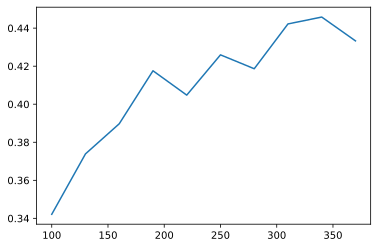

In [86]:
from sklearn import svm
# clf=svm.SVC()
clf = svm.SVC(decision_function_shape='ovo')
test_model(clf)

In [87]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

## Stochastic Gradient Descent

0.39254911359102584


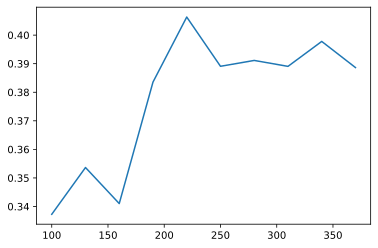

In [88]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="modified_huber",penalty="elasticnet", max_iter=1000)
test_model(clf)

## Logistic Regression

0.42262515396249933


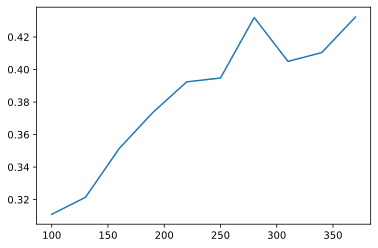

In [89]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial',max_iter=500)
scores=cross_val_score(clf,x,y,cv=5)
test_model(clf)

# Why not try something else?

In [9]:
import tensorflow as tf
from tensorflow.keras import models,layers
result=pd.get_dummies(y_train,prefix="expression")

test_result=pd.get_dummies(y_test,prefix="expression")


In [10]:
X_train.shape

(385, 55)

In [99]:
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(30,activation = 'relu',input_shape=(55,)))
# model.add(layers.Dense(10,activation = 'sigmoid' ))
model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(6,activation = 'sigmoid' ))

model.summary()

model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['AUC'])

history = model.fit(X_train,result,
                    batch_size= 400,
                    epochs= 100,
                    validation_split=0.2 #分割一部分训练数据用于验证
                   )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                1680      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
Total params: 2,056
Trainable params: 2,056
Non-trainable params: 0
_________________________________________________________________
Train on 308 samples, validate on 77 samples
Epoch 1/100
308/308 [==============================] - 1s 2ms/sample - loss: 2.2827 - AUC: 0.5135 - val_loss: 2.0126 - val_AUC: 0.5631
Epoch 2/100
308/308 [==============================] - 0s 58us/sample - loss: 2.2431 - AUC: 0.5142 - val_loss: 1.9930 - val_AUC: 0.5622
Epoch 3/100
308/308 [==============================] - 0s 71us/sampl

308/308 [==============================] - 0s 52us/sample - loss: 1.6845 - AUC: 0.6466 - val_loss: 1.7934 - val_AUC: 0.5506
Epoch 56/100
308/308 [==============================] - 0s 49us/sample - loss: 1.6815 - AUC: 0.6491 - val_loss: 1.7931 - val_AUC: 0.5514
Epoch 57/100
308/308 [==============================] - 0s 49us/sample - loss: 1.6786 - AUC: 0.6516 - val_loss: 1.7928 - val_AUC: 0.5516
Epoch 58/100
308/308 [==============================] - 0s 49us/sample - loss: 1.6756 - AUC: 0.6543 - val_loss: 1.7925 - val_AUC: 0.5529
Epoch 59/100
308/308 [==============================] - 0s 45us/sample - loss: 1.6726 - AUC: 0.6571 - val_loss: 1.7922 - val_AUC: 0.5533
Epoch 60/100
308/308 [==============================] - 0s 49us/sample - loss: 1.6697 - AUC: 0.6594 - val_loss: 1.7918 - val_AUC: 0.5527
Epoch 61/100
308/308 [==============================] - 0s 49us/sample - loss: 1.6668 - AUC: 0.6621 - val_loss: 1.7914 - val_AUC: 0.5532
Epoch 62/100
308/308 [==============================] 

In [110]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'png'

import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.savefig("C:/Users/10069/Desktop/tf"+".png")
    plt.show()
    

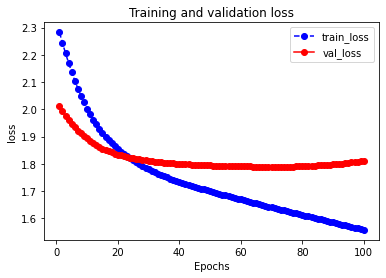

In [111]:
plot_metric(history,"loss")

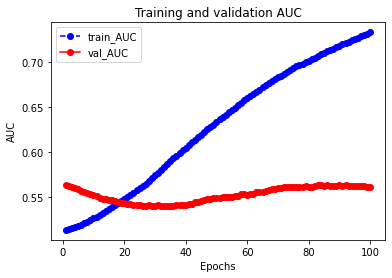

In [112]:
plot_metric(history,"AUC")

In [113]:
model.evaluate(x = X_test,y = test_result)

129/129 [==============================] - 2s 12ms/sample - loss: 1.9451 - AUC: 0.5233


[1.9450839369796042, 0.5232738]

In [204]:
model.predict(X_test)

array([[0.05101622, 0.09413409, 0.05574699, 0.07535228, 0.15703139,
        0.16645794],
       [0.43831256, 0.01323062, 0.12418183, 0.02293586, 0.01878604,
        0.04063722],
       [0.0202135 , 0.3880507 , 0.07925417, 0.05057627, 0.28405443,
        0.1858559 ],
       [0.25887856, 0.0012814 , 0.03366077, 0.17081164, 0.01285847,
        0.02107176],
       [0.6213337 , 0.00377443, 0.05653862, 0.02525819, 0.01187978,
        0.01916109],
       [0.04399271, 0.03067275, 0.04288724, 0.16981982, 0.12649913,
        0.05844799],
       [0.49264783, 0.00980734, 0.03999908, 0.02966256, 0.02984377,
        0.02524457],
       [0.03150002, 0.34173176, 0.08694474, 0.02245661, 0.15054888,
        0.2899553 ],
       [0.01705715, 0.38139245, 0.16508935, 0.12202734, 0.15980652,
        0.20494011],
       [0.0240871 , 0.01071218, 0.17233868, 0.48798782, 0.00910533,
        0.10408724],
       [0.12234758, 0.00354121, 0.16002093, 0.13389215, 0.00705991,
        0.04822295],
       [0.00656928, 0